In [1]:
import unicodecsv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import re
from nltk import pos_tag


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
import numpy as np

import csv                             
import nltk
nltk.data.path.append("/Users/Shared/nltk_data")

In [2]:
def loadData(path, Text=None):
    with open(path, 'r',encoding='utf-8') as f:
        reader = csv.reader(f,delimiter=',')
        for line in reader:
            (Lines, Character, Gender) = parseReview(line)
            rawData.append((Lines,Character, Gender))
            


def splitData(percentage):     # A method to split the data between trainData and testData 
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Lines, _, Gender) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Lines)),Gender))
    for (Lines, _, Gender) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Lines)),Gender))

In [3]:
def parseReview(reviewLine):
    
    Lines = reviewLine[0]
    Character = reviewLine[1]
    Gender = reviewLine[2]
    
    return reviewLine[0], reviewLine[1], reviewLine[2] 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
    
# Text processing with Scikit-Learn, basics
# Creating a vectorizer that can be used to extract a bag of words
# representation from documents


stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()


stemmer = SnowballStemmer("english")
stemmer = PorterStemmer()
# Input: a string of one review
def preProcess(character_text):


    pos_tags = [x[1] for x in pos_tag(character_text)] 
    text = word_tokenize(character_text)
    b = []
    for word in text:
        if word.isalpha(): # removing punctuation
            if word not in stop_words: # removing stopwords or "too common" words
                word = word.lower() # converting all letters to lower case 
#                 word = wordnet_lemmatizer.lemmatize(word)  # lemmatisation
#                 word = stemmer.stem(word) # Using standard stemmer from the nltk
                b.append(word)
     
    return b,pos_tags #returns both pos-tags and a list of words that have been pre-processed

In [1]:
featureDict = {} # A global dictionary of features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

def toFeatureVector(put):
    tokens,pos_tags = put
# Should return a dictionary containing features as keys, and weights as values
    featureVector = {}
    for token in tokens: #split words into tokens and pos
        if token not in featureVector:
            featureVector[token] = 1.0
        else:
            featureVector[token] = float(featureVector[token] + 1)
            
        if token not in featureVector:
            featureVector[token] = 1.0
        else:
            featureVector[token] = float(featureDict[token] + 1)

        
#     for pos in pos_tags: #split words into tokens and pos
#         if pos not in featureVector:
#             featureVector[pos] = 1.0
#         else:
#             featureVector[pos] = float(featureVector[pos] + 1)
            
#         if pos not in featureDict:
#             featureDict[pos] = 1.0
#         else:
#             featureDict[pos] = float(featureDict[pos] + 1)    
            
    
#     for i in range(1, len(tokens)):
#             bigram = tokens[i-1] + " " + tokens[i]
#             try:
#                 featureVector[bigram] = 1 #+= 1.0/len(tokens)
#             except KeyError:
#                 featureVector[bigram] = 1 #= 1.0/len(tokens)
#             try:
#                 featureVector[bigram] += 1.0
#             except KeyError:
#                 featureVector[bigram] = 1.0

#     sentence = len(tokens)    
#     featureDict['length']= sentence
        
    return featureVector

results have been taken from the classification report on the training dataset using a classifier linear classifer with a parameter of C as 0.01

#KEY
[

1=WORDS

2=PUNCTUATION_REMOVAL+WORDS,

3=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

4=LOWER+STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

5=LEMMA+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

6=STEM+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS
]


UNIGRAMS_1 = [
              precision    recall  f1-score   support

      female       0.57      0.59      0.58      1017
        male       0.57      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]

UNIGRAMS_2=[
             precision    recall  f1-score   support

      female       0.57      0.58      0.57      1017
        male       0.56      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]

UNIGRAMS_3=[
              precision    recall  f1-score   support

      female       0.56      0.57      0.56      1017
        male       0.55      0.54      0.54      1006

    accuracy                           0.55      2023
   macro avg       0.55      0.55      0.55      2023
weighted avg       0.55      0.55      0.55      2023

]

UNIGRAMS_4=[
              precision    recall  f1-score   support

      female       0.57      0.59      0.58      1017
        male       0.57      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]


UNIGRAMS_5=[
              precision    recall  f1-score   support

      female       0.56      0.59      0.58      1017
        male       0.57      0.54      0.55      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.56      0.56      2023
weighted avg       0.57      0.57      0.56      2023
]

UNIGRAMS_6=[
              precision    recall  f1-score   support

      female       0.57      0.58      0.57      1017
        male       0.56      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.57      0.56      2023
]

conclusion: 
While training results were best with UNIGRAMS_4 and UNIGRAMS_1 preprocessing in use.
Using UNIGRAMS_5 was found to be better than UNIGRAMS_6 while UNIGRAMS_1 was on par with UNIGRAMS_4 .
UNIGRAMS_3 was found to be the worst performing 

results have been taken from the classification report on the training dataset using a classifier linear classifer with a parameter of C as 0.01

#KEY
[

1=WORDS

2=PUNCTUATION_REMOVAL+WORDS,

3=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

4=LOWER+STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

5=LEMMA+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

6=STEM+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS
]

POS_1=[
              precision    recall  f1-score   support

      female       0.52      0.61      0.56      1017
        male       0.52      0.43      0.47      1006

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023    
]    
POS_2=[
              precision    recall  f1-score   support

      female       0.52      0.60      0.56      1017
        male       0.52      0.44      0.48      1006

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023    
]    
POS_3=[
              precision    recall  f1-score   support

      female       0.52      0.61      0.56      1017
        male       0.52      0.44      0.48      1006

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023    
]    
POS_4=[
              precision    recall  f1-score   support

      female       0.52      0.61      0.56      1017
        male       0.52      0.44      0.48      1006

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023    
]    
POS_5=[
              precision    recall  f1-score   support

      female       0.52      0.60      0.56      1017
        male       0.53      0.45      0.48      1006

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023    
]        
POS_6=[
              precision    recall  f1-score   support

      female       0.52      0.60      0.56      1017
        male       0.52      0.44      0.47      1006

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023
]

conclusion: 
While training results were best with pos only was  pos_4 and pos_5
However, using Pos taggers by itself was found to be worst than using just unigrams

results have been taken from the classification report on the training dataset using a classifier linear classifer with a parameter of C as 0.01

#KEY
[

1=WORDS

2=PUNCTUATION_REMOVAL+WORDS,

3=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

4=LOWER+STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

5=LEMMA+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

6=STEM+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS
]

UNIGRAMS_POS_1=[
              precision    recall  f1-score   support

      female       0.56      0.59      0.58      1017
        male       0.57      0.54      0.55      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.56      0.56      2023
weighted avg       0.57      0.57      0.56      2023
]

UNIGRAMS_POS_2=[
              precision    recall  f1-score   support

      female       0.56      0.58      0.57      1017
        male       0.56      0.54      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023
]


UNIGRAMS_POS_3=[
              precision    recall  f1-score   support

      female       0.56      0.57      0.56      1017
        male       0.56      0.54      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023
]

UNIGRAMS_POS_4=[
              precision    recall  f1-score   support

      female       0.57      0.58      0.57      1017
        male       0.56      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]

UNIGRAMS_POS_5=[
              precision    recall  f1-score   support

      female       0.56      0.57      0.56      1017
        male       0.56      0.54      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023

UNIGRAMS_POS_6=[
              precision    recall  f1-score   support

      female       0.56      0.58      0.57      1017
        male       0.56      0.54      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023

]

conclusion: 
While training results have unigrams+pos were best with UNIGRAMS_POS_4 preprocessing in use.
Using UNIGRAMS_POS_6 was found to be better than UNIGRAMS_POS_5 while UNIGRAMS_POS_3 was equal.
UNIGRAMS_POS_3 was found to be the worst performing.

UNIGRAMS_POS_4 and UNIGRAMS_POS_4




While training results were best with UNIGRAMS_POS_4.
Using UNIGRAMS_POS_6 was found to be better than UNIGRAMS_POS_5 while UNIGRAMS_POS_3 was equal.
UNIGRAMS_POS_3 was found to be the worst performing.
However results shows that using UNIGRAMS_POS_4 was worst performing than UNIGRAMS_4 on the training dataset.

*results have been taken from the classification report on the training dataset using a classifier linear classifer with a parameter of C as 0.01


#KEY
[

1=WORDS

2=PUNCTUATION_REMOVAL+WORDS,

3=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

4=LOWER+STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

5=LEMMA+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS,

6=STEM+LOWER=STOPWORDREM+PUNCTUATION_REMOVAL+WORDS
]


UNIGRAMS_BIGRAMS_POS_1=[
              precision    recall  f1-score   support

      female       0.57      0.59      0.58      1017
        male       0.57      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]

UNIGRAMS_BIGRAMS_POS_2=[
              precision    recall  f1-score   support

      female       0.55      0.57      0.56      1017
        male       0.55      0.53      0.54      1006

    accuracy                           0.55      2023
   macro avg       0.55      0.55      0.55      2023
weighted avg       0.55      0.55      0.55      2023
]

UNIGRAMS_BIGRAMS_POS_3=[
              precision    recall  f1-score   support

      female       0.55      0.57      0.56      1017
        male       0.55      0.53      0.54      1006

    accuracy                           0.55      2023
   macro avg       0.55      0.55      0.55      2023
weighted avg       0.55      0.55      0.55      2023
]

UNIGRAMS_BIGRAMS_POS_4=[
              precision    recall  f1-score   support

      female       0.55      0.58      0.56      1017
        male       0.55      0.52      0.54      1006

    accuracy                           0.55      2023
   macro avg       0.55      0.55      0.55      2023
weighted avg       0.55      0.55      0.55      2023
]

UNIGRAMS_BIGRAMS_POS_5=[
              precision    recall  f1-score   support

      female       0.56      0.59      0.57      1017
        male       0.56      0.53      0.54      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023
]

UNIGRAMS_BIGRAMS_POS_6=[
              precision    recall  f1-score   support

      female       0.56      0.59      0.57      1017
        male       0.56      0.53      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023
]

UNIGRAMS_BIGRAMS_WORDS_6=[
              precision    recall  f1-score   support

      female       0.57      0.60      0.59      1017
        male       0.58      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]
UNIGRAMS_BIGRAMS_WORDS_POS_SENTENCE_LENGTH_6=[
              precision    recall  f1-score   support

      female       0.56      0.59      0.57      1017
        male       0.56      0.53      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023
]

UNIGRAMS_BIGRAMS_WORDS_4=[
              precision    recall  f1-score   support

      female       0.56      0.59      0.57      1017
        male       0.56      0.53      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023
]




In [6]:
# TRAINING AND VALIDATING OUR CLASSIFIER
def trainClassifier(trainData):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC(C = 0.1, class_weight = "balanced"))])
    #pipeline =  Pipeline([('tfidf', TfidfTransformer()),('chi2', SelectKBest(chi2, k=20000)),('svc', LinearSVC(loss = 'hinge'))])
    return SklearnClassifier(pipeline).train(trainData)

UNIGRAMS_BIGRAMS_WORDS_STEM_POS_SENTENCE_LENGTH_TFIDFTRANSFORMER_K=1000=[
              precision    recall  f1-score   support

      female       0.58      0.43      0.49      1017
        male       0.54      0.69      0.61      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.55      2023
weighted avg       0.56      0.56      0.55      2023
]


UNIGRAMS_TFIDFTRANSFORMER_K=1500=[
              precision    recall  f1-score   support

      female       0.57      0.44      0.50      1017
        male       0.54      0.66      0.59      1006

    accuracy                           0.55      2023
   macro avg       0.55      0.55      0.55      2023
weighted avg       0.55      0.55      0.55      2023
    
]

UNIGRAMS_BIGRAMS_WORDS_STEM_POS_SENTENCE_LENGTH_TFIDFTRANSFORMER_K=2000=[
              precision    recall  f1-score   support

      female       0.58      0.45      0.51      1017
        male       0.55      0.67      0.60      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.55      2023
weighted avg       0.56      0.56      0.55      2023
]

UNIGRAMS_BIGRAMS_WORDS_STEM_POS_SENTENCE_LENGTH_LINEARSVC_PARAMETER_SET_0.1=[
              precision    recall  f1-score   support

      female       0.56      0.58      0.57      1017
        male       0.56      0.55      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023

]

UNIGRAMS_BIGRAMS_WORDS_STEM_POS_SENTENCE_LENGTH_LINEARSVC_PARAMETER_SET_0.01=[
              precision    recall  f1-score   support

      female       0.57      0.59      0.58      1017
        male       0.57      0.55      0.56      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]


UNIGRAMS_BIGRAMS_WORDS_STEM_POS_SENTENCE_LENGTH_LINEARSVC_PARAMETER_SET_0.001=[
              precision    recall  f1-score   support

      female       0.56      0.64      0.60      1017
        male       0.58      0.50      0.54      1006

    accuracy                           0.57      2023
   macro avg       0.57      0.57      0.57      2023
weighted avg       0.57      0.57      0.57      2023
]

conclusion: linearsvc classifer was used as with a parameter set to 0.1 as it showed the most similar results scores between males and females having the highest weight score and accuracy. It should be considered that the scores from the classifcation report were found with all the features and preprocessing techniques used.

In [7]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predictLabels(reviewSamples, classifier):
    return classifier.classify_many(map(lambda t: t[0], reviewSamples))

def predictLabel(text, classifier):
    return classifier.classify(toFeatureVector(preProcess(text)))


In [8]:
rawData = [] # the filtered data from the dataset file        
trainData = [] # the training data as a percentage of the total dataset 
testData = []  # the test data as a percentage of the total dataset        


# references to the data files
Path = 'training.csv'

loadData(Path) 

splitData(0.8)


In [9]:

classifier = trainClassifier(trainData)  # train the classifier
testTrue = [t[1] for t in testData]   # get the ground-truth labels from the data
testPred = predictLabels(testData, classifier)  # classify the test data to get predicted labels
print("Done training!")
print(classification_report(testTrue, testPred))


Training Classifier...
Done training!
              precision    recall  f1-score   support

      female       0.56      0.58      0.57      1017
        male       0.56      0.55      0.55      1006

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023



In [10]:
# references to the data files
rawData = []         
trainData = []        
testData = []   

# references to the data files
Path = 'test.csv'
loadData(Path) 


splitData(0)# used to split data between training and test setting to 0 means all values are in testdata

testTrue = [t[1] for t in testData]   # get the ground-truth labels from the data
testPred = predictLabels(testData, classifier)  # classify the test data to get predicted labels
print("Done training!")
print(classification_report(testTrue, testPred))

Done training!
              precision    recall  f1-score   support

      female       0.55      0.61      0.58       526
        male       0.62      0.56      0.59       598

    accuracy                           0.59      1124
   macro avg       0.59      0.59      0.59      1124
weighted avg       0.59      0.59      0.59      1124



In [11]:
def confusion_matrix_heatmap(testTrue, testPred):
    """Function to plot a confusion matrix"""
    labels = list(set(testPred))   # get the labels in the y_test
    # print(labels)
    cm = confusion_matrix(testTrue, testPred, labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=0)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="orange")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

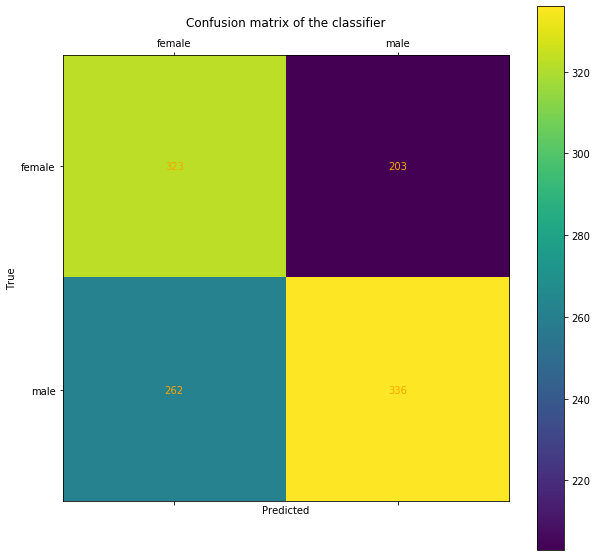

In [12]:
confusion_matrix_heatmap(testTrue, testPred)

As seen by the results we can not predict the gender with great reliability at 59% as it would mean that there is a large difference in the way that males and females speak within Eastenders.If we could be seen as the show being written poorly with defined sterotypes created in the way genders speak on the show.This can be seen by the colours indicted in the confusion matrix, the classifer was slightly better at a prediciting when a male was speaking than a female however it maybe due to more male lines were included in dataset than female lines leading to a high precision but a lower recall. However, we have seen that increasing the perprocessing techniques and features used does not always increase the classification scores. It was found that using unigrams with preprocessing techniques of using lowercases,stopwords removal and punctuation removal was best for the score on the test dataset.